In [166]:
# https://github.com/rauthbibek/eKYC

import numpy as np
import cv2
import matplotlib.pyplot as plt


## **<font style="color:rgb(134,19,348)">Image Smoothing/ Blurring</font>**

### **<font style="color:rgb(120,120,50)">Mean Blur</font>**

It is the simplest case of smoothing operation. This operation takes the average of the pixels and replace the central pixel with this average.

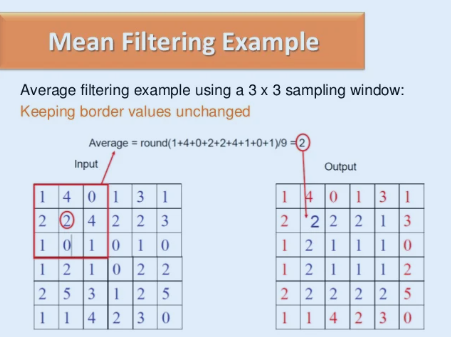

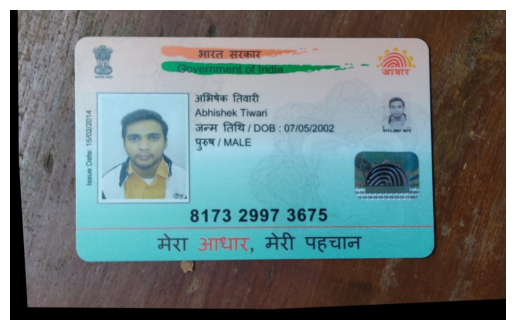

In [167]:
# Show the original image
# img =  cv2.imread("data\\01_raw_data\\bibek_face.jpg")
img = cv2.imread("data\\01_raw_data\\sample_image1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

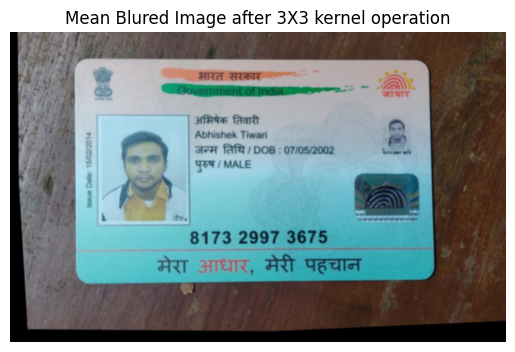

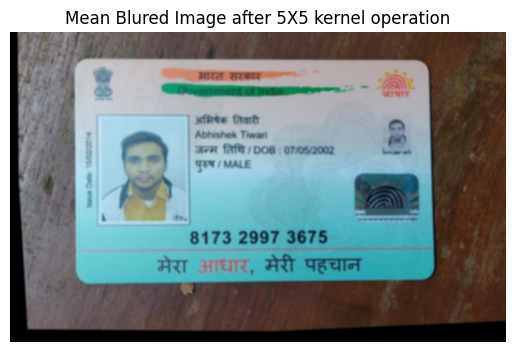

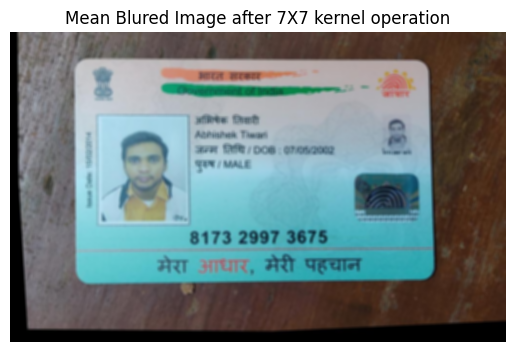

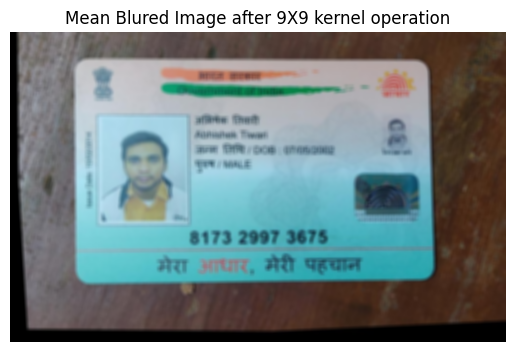

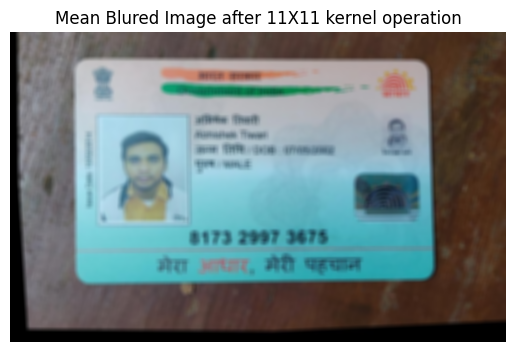

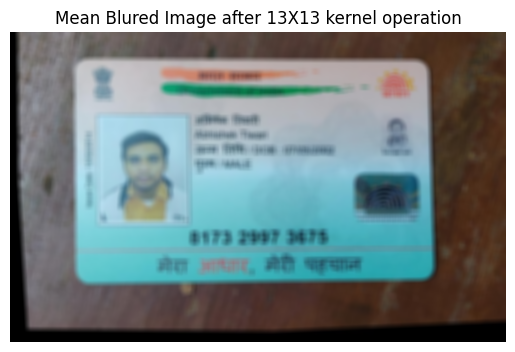

In [169]:
# creating mean filter kernel
def meankernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk

for size in range(3, 14, 2):
    blur_img = cv2.filter2D(img , -1, meankernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()
# mk = meankernel(size=3)
# mk



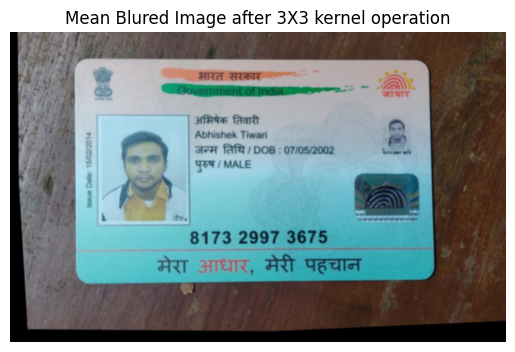

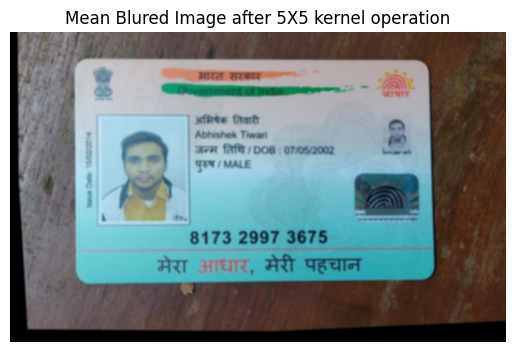

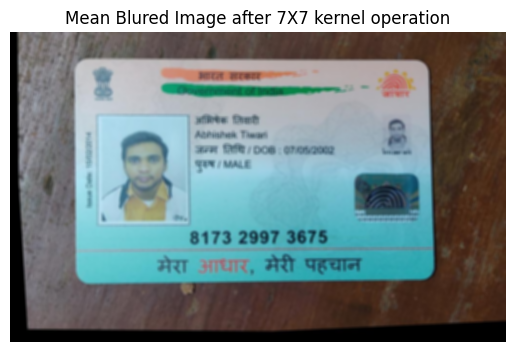

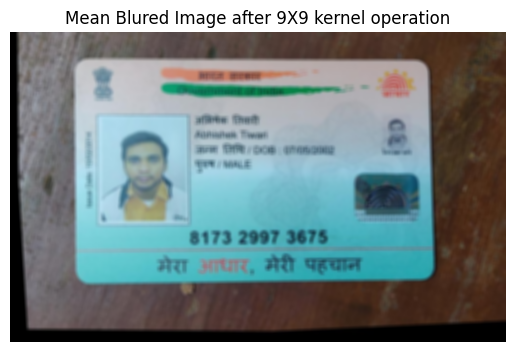

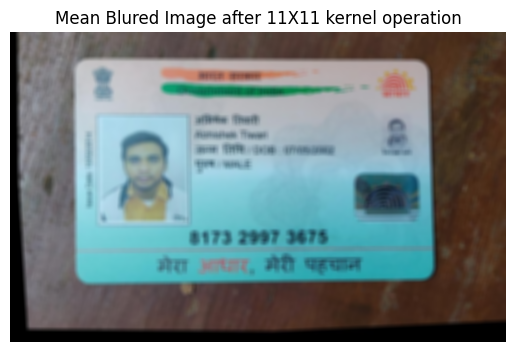

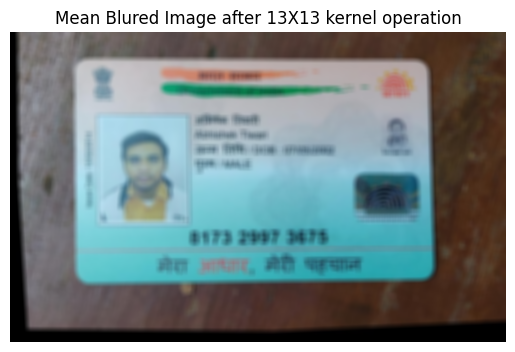

In [170]:
for size in range(3, 14, 2):
    blur_img = cv2.blur(img, (size, size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()


### **<font style="color:rgb(120,120,50)">Gaussian Blur</font>**

It is a method of blurring the image through the use of Gaussian Function. 

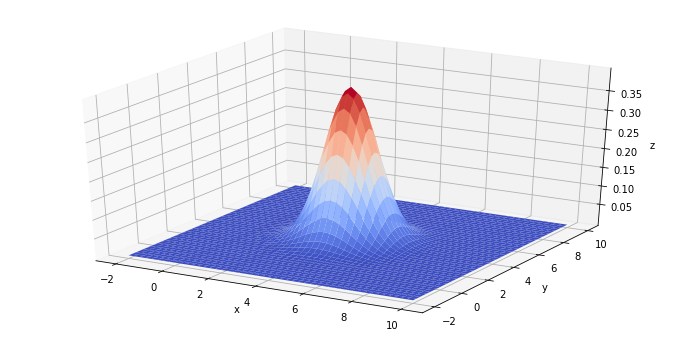

Imagine that this distribution is superimposed over a group of pixels in an image. It should be apparent looking at this graph, that if we took a weighted average of a pixel's values and the height of the curve at that point, the pixels in the center of the group would contribute most significantly to the resulting value.

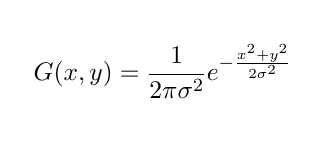

In [171]:
import numpy as np

def gaussian_kernel(sigma):
    kernel_size = 3
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    normalization_factor = 1 / (2 * np.pi * sigma**2)
    # print(center)

    for i in range(kernel_size):
        for j in range(kernel_size):
            # x and y represent the distance of the current pixel from 
            # the center of the kernel in the horizontal and vertical directions, respectively.
            x = i - center
            y = j - center
            kernel[i, j] = normalization_factor*np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel
    kernel /= np.sum(kernel)
    
    return kernel

# Example usage
sigma = 0.8
gaussian_kernel_3x3 = gaussian_kernel(sigma)
print("3x3 Gaussian Kernel:")
print(gaussian_kernel_3x3)


3x3 Gaussian Kernel:
[[0.05711826 0.12475775 0.05711826]
 [0.12475775 0.27249597 0.12475775]
 [0.05711826 0.12475775 0.05711826]]


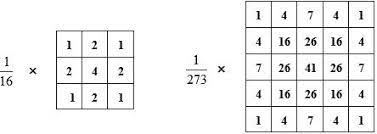

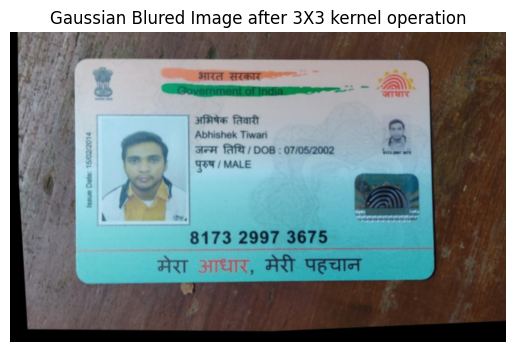

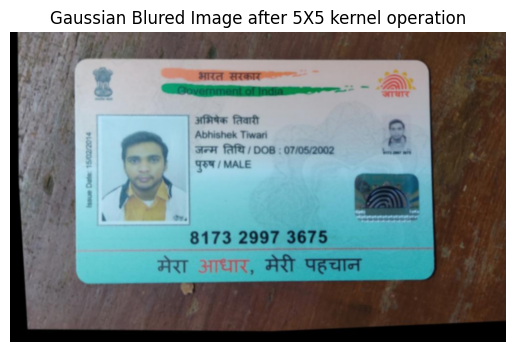

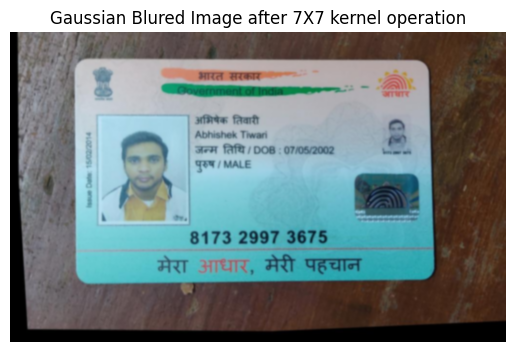

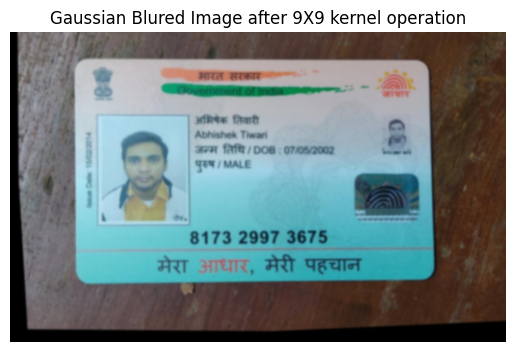

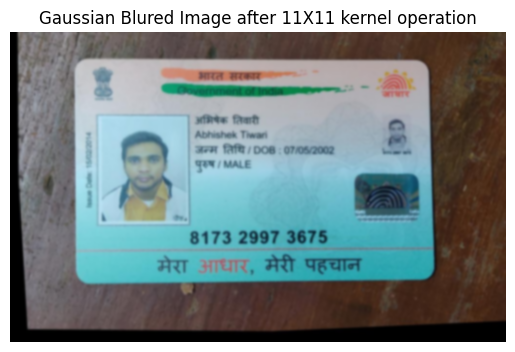

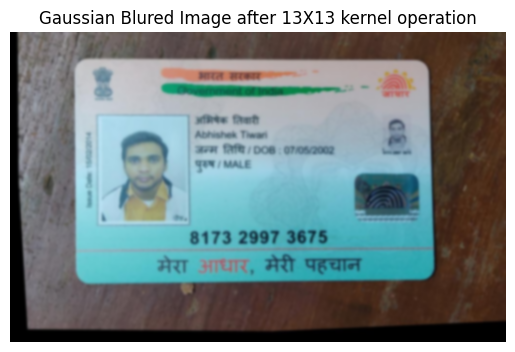

In [172]:
for size in range(3, 14, 2):
    blur_img = cv2.GaussianBlur(img, (size, size), 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()


## **<font style="color:rgb(134,19,348)">Histograms</font>**

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values(ranging from 0 to 255) in X-axis and corresponding number of pixels in the image on Y-axis.

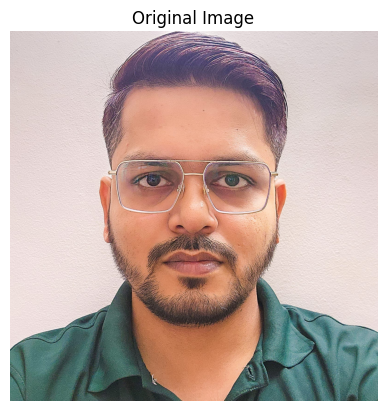

In [173]:
bgr_img = cv2.imread("data\\01_raw_data\\bibek_face.jpg")
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [174]:
img.shape

(1600, 1589, 3)

In [175]:
1600*1589*3

7627200

In [176]:
# shape after flattening the image
img.ravel().shape

(7627200,)

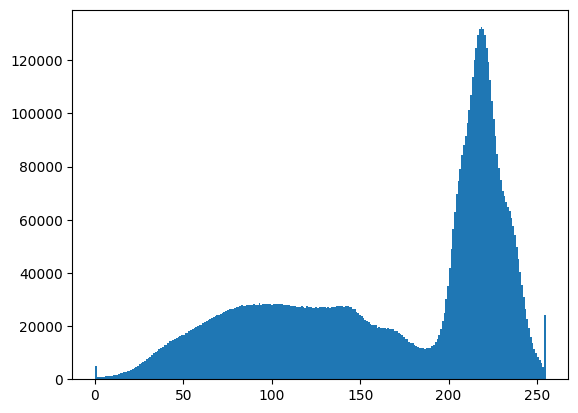

In [177]:
# Histograms
plt.hist(img.ravel(), bins =  256, range=[0, 255])
plt.show()

In [178]:
colors = ('b', 'g', 'r')

bgr_img_ravel = [bgr_img[:, :, 0].ravel(), bgr_img[:, :, 1].ravel(), bgr_img[:,:, 2].ravel()]

In [179]:
bgr_img_ravel

[array([204, 208, 203, ...,  75,  72,  46], dtype=uint8),
 array([204, 208, 203, ...,  90,  87,  62], dtype=uint8),
 array([216, 220, 215, ...,  63,  59,  31], dtype=uint8)]

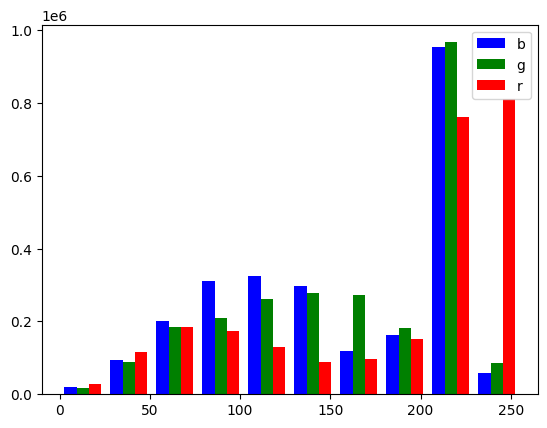

In [180]:
plt.hist(bgr_img_ravel, color=colors, label=colors)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))

for i, color in enumerate(colors):
    histogram = cv2.calcHist([bgr_img], [i], None, [256], [0, 256])
    plt.plot(histogram, color = color)

plt.show()

## **<font style="color:rgb(134,19,348)">Thresholding</font>**

### **<font style="color:rgb(120, 120, 50)">Simple Thresholding</font>**
 Where you have to manually supply threshold value.
 Applying simple thresholding methods requires human intervention. We must specify a threshold value T. All pixel intensities below T are set to 255. And all pixel intensities greater than T are set to 0.

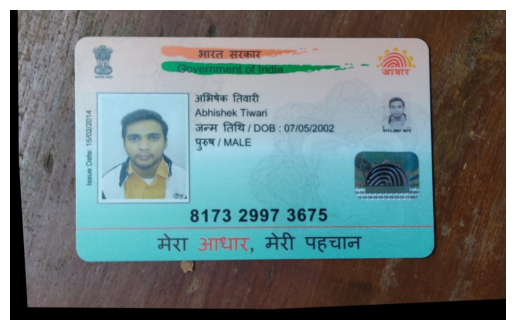

In [181]:
# Reading image
image = cv2.imread("data\\01_raw_data\\sample_image1.jpg")
rgb_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis("off")
plt.show()

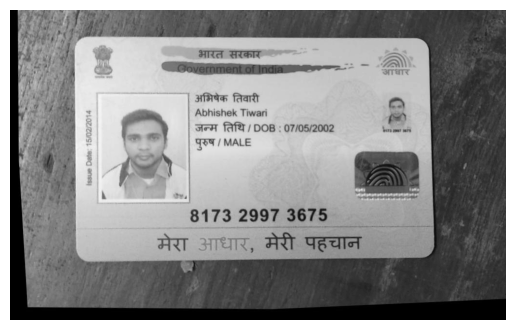

In [182]:
# Gray Scale Conversion

gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

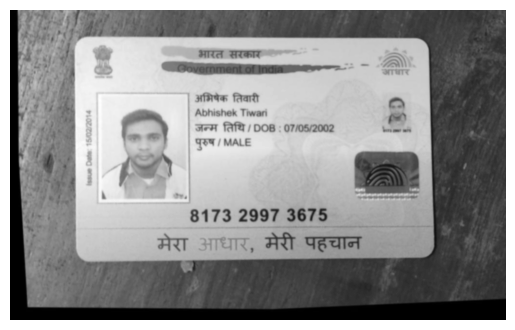

In [183]:
blurred =  cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()

- After the image is blurred, we compute the thresholded image using cv2.threshold function. This method requires four arguments.

- The first is the grayscale image that we wish to threshold. We supply our blurred image as the first.

- Then, we manually supply our T threshold value. We use a value of T=200.

- Our third argument is the output value applied during thresholding. Any pixel intensity p that is greater than T is set to zero and any p that is less than T is set to the output value:

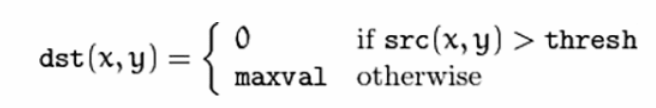


In our example, any pixel value that is greater than 200 is set to 0. Any value that is less than 200 is set to 255.

Finally, we must provide a thresholding method. We use the **`cv2.THRESH_BINARY_INV`** method, which indicates that pixel values p less than T are set to the output value (the third argument).

But what if we wanted to perform the reverse operation, like this:

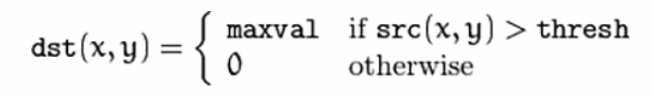

Using **`cv2.THRESH_BINARY`** we can achieve this

In most cases you are normally seeking your segmented objects to appear as white on a black background, hence using **`cv2.THRESH_BINARY_INV`**. But in the case that you want your objects to appear as black on a white background, be sure to supply the **`cv2.THRESH_BINARY`** flag.

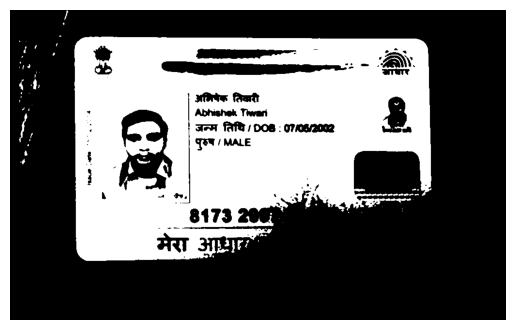

In [184]:
T, thresh =  cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

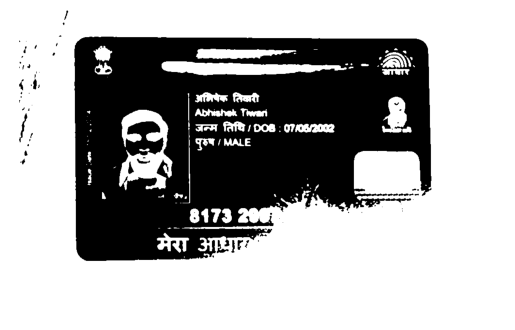

In [185]:
T, threshInv =  cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap='gray')
plt.axis("off")
plt.show()

### **<font style="color:rgb(120,120,50)">Otsu Thresholding</font>**
In the previous section on simple thresholding we needed to manually supply a threshold value of T. For simple images in controlled lighting conditions, it might be feasible for us to hardcode this value.

But in real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method.


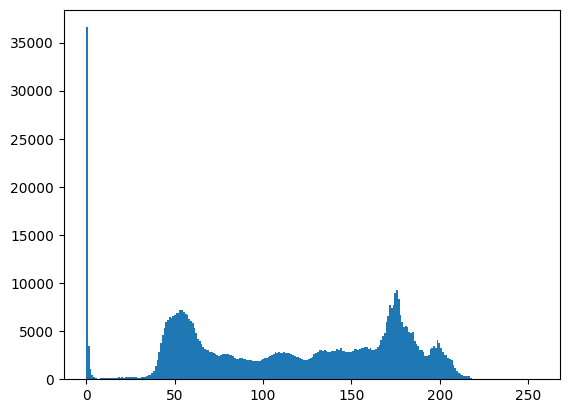

In [186]:
# Histograms
plt.hist(gray.ravel(), bins =  256, range=[0, 255])
plt.show()

Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.

Notice how the histogram clearly has two peaks — the first sharp peak corresponds to the uniform background color of the image, while the second peak corresponds to the card region itself

[INFO] otsu's thresholding value: 110.0


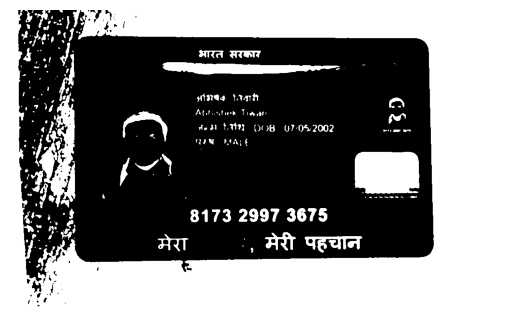

In [187]:
(T, otsu_threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print("[INFO] otsu's thresholding value: {}".format(T))

plt.imshow(otsu_threshInv, cmap='Greys_r')
plt.axis("off")
plt.show()

In [188]:
T

110.0

### **<font style="color:rgb(120,120,50)">Adaptive Thresholding</font>**

Goal in adaptive thresholding is to statistically examine local regions of our image and determine an optimal value of T for each region — which begs the question: Which statistic do we use to compute the threshold value T for each region?

It is common practice to use either the arithmetic mean or the Gaussian mean of the pixel intensities in each region (other methods do exist, but the arithmetic mean and the Gaussian mean are by far the most popular).

In the arithmetic mean, each pixel in the neighborhood contributes equally to computing T. And in the Gaussian mean, pixel values farther away from the (x, y)-coordinate center of the region contribute less to the overall calculation of T.

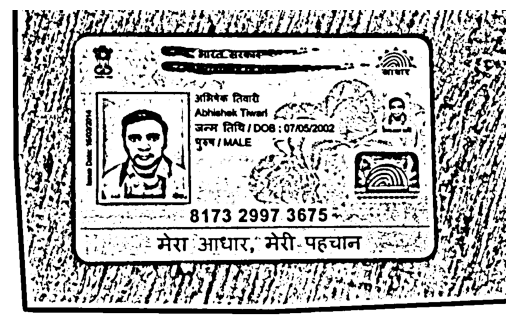

In [189]:
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

## **<font style="color:rgb(134,19,348)">Contour Detection</font>**


### **<font style="color:rgb(120,120,50)">What is Contour?</font>**

Contour is a boundary around something that has well defined edges, so the machine is able to calculate difference in gradient, and form a recognisable shape through continuing chnage and draw a boundary around it.


**`cv2.findContours()`**
- image: The binary input image.
- mode: Contor-retrieval mode.
- method: Contour-approximation method.

<!-- #### Mode?

- RETR_TREE: This mode retrieves all the contours and reconstructs the full hierarchy of nested contours. The hierarchy represents the relationship between contours, such as parent-child relationships.

- RETR_EXTERNAL: Retrieves only the external contours (contours that form the outer boundary).

- RETR_LIST: Retrieves all contours without any hierarchical relationships.

- RETR_CCOMP: Retrieves all contours and organizes them into a two-level hierarchy: external and holes.

- RETR_FLOODFILL: Retrieves contours by the flood-fill algorithm.

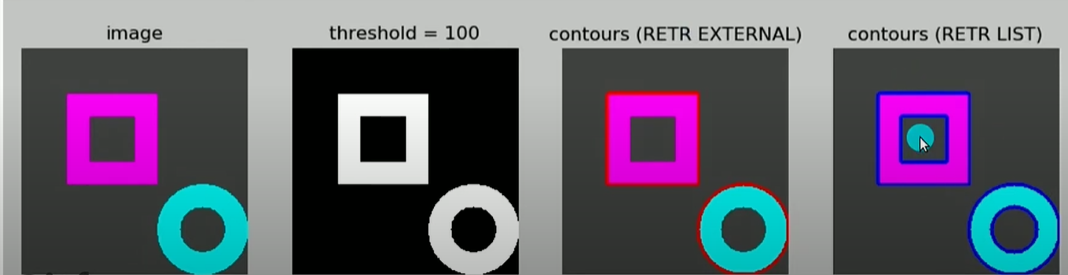 -->


### **<font style="color:rgb(120,120,50)">Retrieval Modes</font>**
Function **`cv2.findContours()`** does not only returns the contours found in an image but also returns valuable information about the hierarchy of the contours in the image. The hierarchy encodes how the contours may be arranged in the image, e.g, they may be nested within another contour. Often we are more interested in some contours than others. For example, you may only want to retrieve the external contour of an object.

Using the Retrieval Modes specified, the **`cv2.findContours()`** function can determine how the contours are to be returned or arranged in a hierarchy.  For more information on Retrieval modes and contour hierarchy [Read here](https://docs.opencv.org/4.1.0/d9/d8b/tutorial_py_contours_hierarchy.html).

Some of the important retrieval modes are:

- **`cv2.RETR_EXTERNAL`** - retrieves only the extreme outer contours.
- **`cv2.RETR_LIST`** - retrieves all of the contours without establishing any hierarchical relationships.
- **`cv2.RETR_TREE`** - retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- **`cv2.RETR_CCOMP`** - retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

### **<font style="color:rgb(120,120,50)">Compression Methods</font>**

Detected contours can be compressed to reduce the number of points. In this sense, OpenCV provides sevaral methods to reduce the number of points. This can be set with the parameter method.

- **`CHAIN_APPROX_SIMPLE`**: This is faster, approximates the contour and compresses horizontal, vertical, and diagonal segments, keeping only their end points.

- **`CHAIN_APPROX_NONE`**: This retains all the original contour points, making it suitable when precise contour representation is required, but it might be slower and consume more memory compared to CHAIN_APPROX_SIMPLE.

contours (133, 54, 743, 466)
Area 335363.0


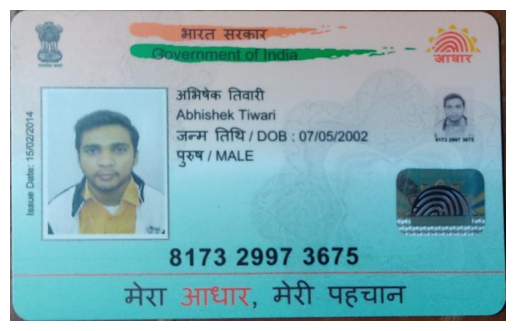

In [196]:

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_image[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

# len(contours)

In [ ]:
# contours[5]
# cv2.boundingRect(contours[5])

In [ ]:
# plt.imshow(contour_id[:, 100:400])
# plt.show()

## **<font style="color:rgb(134,19,348)">Face Detection</font>**


Haar Cascade is a feature-based object detection algorithm to detect objects from images. A cascade function is trained on lots of positive and negative images for detection.

Haar cascade uses the cascade function and cascading window. It tries to calculate features for every window and classify positive and negative. If the window could be a part of an object, then positive, else, negative

 **`Pre-trained Haar Cascades:`**

The OpenCV library manages a repository on GitHub for all popular haar cascades pre-trained files that can be used for various object detection tasks, for example:

- Human face detection
- Eye detection
- Vehicle detection
- Nose / Mouth detection
- body detection
- license plate detection

### **<font style="color:rgb(120,120,50)">Steps Breaking Down</font>**

https://youtu.be/ZSqg-fZJ9tQ?si=eSwecEEq0Zj6vHWK

**`face_cascade = cv2.CascadeClassifier(<XML_cascade_path>)`**

This initializes a cascade classifier object using OpenCV's *`CascadeClassifier`* class. A cascade classifier is a machine learning-based model trained to detect objects in images. In this case, this classifier trained specifically to detect human faces. The *`XML_cascade_path`* variable should contain the path to the XML file that defines the cascade classifier model.

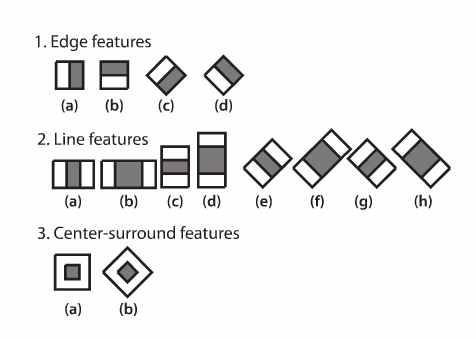

**`faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)`**

The primary purpose of detectMultiScale is to detect objects of interest (e.g., faces) at multiple scales within an image. Objects can appear at different sizes due to variations in distance, perspective, or image resolution. By processing the image at multiple scales, the algorithm increases the likelihood of detecting objects of varying sizes.

Internally, detectMultiScale employs a sliding window approach. It moves a rectangular window (often referred to as a "window" or "detector") across the image at different positions and scales. At each position and scale, the classifier evaluates whether the contents of the window resemble the target object (e.g., a face). The classifier is trained to recognize patterns and features indicative of the object being detected.

- *`scaleFactor`*: This parameter specifies how much the image size is reduced at each image scale. It helps in the detection of faces at different scales. A smaller scaleFactor value increases the chance of detecting faces but also increases computation time. A value of 1.1 means the algorithm is trying to detect faces at slightly different scales by resizing the input image by 10% at each step.

    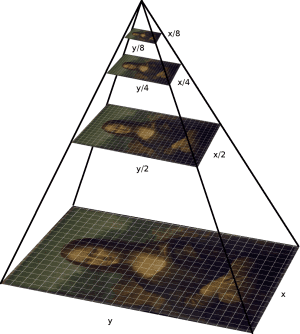

- *`minNeighbors`*: This parameter specifies how many neighbors each candidate rectangle should have to retain it. Higher values result in fewer detections but with higher quality. A lower value will detect more faces but might also include false positives. A value of 5 indicates that a candidate rectangle should have at least 5 neighbors to be considered a valid detection.




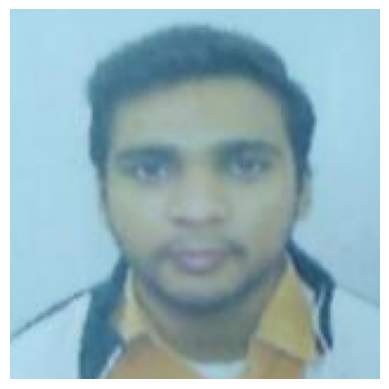

In [200]:
cascade_path = "data\\models\\haarcascade_frontalface_default.xml"

gray_img = cv2.cvtColor(contour_id, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = contour_id[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

In [ ]:
# Save the image using cv2.imwrite
cv2.imwrite("data\\01_raw_data\\extracted_face.jpg", extracted_face)

## **<font style="color:rgb(134,19,348)">Face Comparison</font>**

**`Dlib`**: Dlib is a C++ library with Python bindings, known for its excellent face detection and shape prediction capabilities. It also includes a pre-trained face recognition model.

**`Face_recognition`**: This Python library is built on top of dlib and provides a simple API for face recognition tasks. It offers both face detection and recognition functionalities.

In [201]:
import face_recognition

face1 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face2 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

face3 = face_recognition.load_image_file("data\\01_raw_data\\bibek_face.jpg")
face3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

#--Converting image into encodings
face_encode1 = face_recognition.face_encodings(face1)[0]
face_encode2 = face_recognition.face_encodings(face2)[0]
face_encode3 = face_recognition.face_encodings(face3)[0]


In [203]:
len(face_encode1)

128

In [204]:
print(face_recognition.compare_faces([face_encode1],face_encode2)[0])
print(face_recognition.compare_faces([face_encode3],face_encode2)[0])



True
False


**`Face Encoding`**: Each detected and aligned face is encoded into a numerical representation, typically a high-dimensional feature vector. This encoding captures unique facial characteristics, such as the arrangement of facial landmarks, texture, and shape.

**`Similarity Metric`**: To determine if two face encodings represent the same person or different individuals, a similarity metric is applied. Commonly used metrics include Euclidean distance or cosine similarity. These metrics calculate the distance or similarity between two feature vectors.

## **<font style="color:rgb(134,19,348)">Text Extraction(OCR)</font>**

In [197]:
import easyocr

reader = easyocr.Reader(['en'])

result = reader.readtext(contour_id)

result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[251, 23], [390, 23], [390, 50], [251, 50]], 'HT HIET', 0.1890296973812031),
 ([[207, 53], [434, 53], [434, 83], [207, 83]],
  'Government onindia',
  0.7936069943985734),
 ([[244, 114], [386, 114], [386, 140], [244, 140]],
  'Hfaved faart',
  0.1544560141483067),
 ([[246, 143], [402, 143], [402, 170], [246, 170]],
  'Abhishek Tiwari',
  0.7250974030834377),
 ([[21, 151], [39, 151], [39, 229], [21, 229]], '1', 0.06560830704279397),
 ([[244, 174], [358, 174], [358, 204], [244, 204]],
  'JTn 1fr',
  0.05437870574045007),
 ([[366, 176], [420, 176], [420, 202], [366, 202]], 'DOB', 0.9999467292411697),
 ([[428, 176], [540, 176], [540, 202], [428, 202]],
  '07/05/2002',
  0.9999514829072368),
 ([[246, 206], [368, 206], [368, 238], [246, 238]],
  '56y / MALE',
  0.47912905027866676),
 ([[21, 233], [39, 233], [39, 271], [21, 271]], '8', 0.9987064017818206),
 ([[25, 271], [39, 271], [39, 311], [25, 311]], 'I', 0.13302610366253376),
 ([[233, 349], [529, 349], [529, 391], [233, 391]],
  '8173 

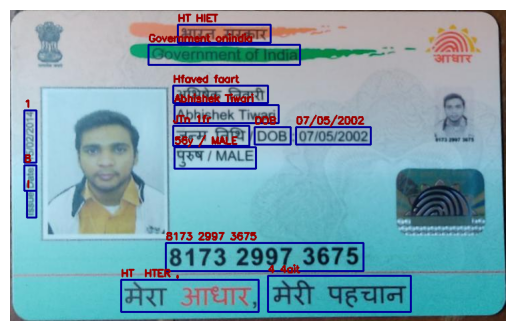

In [198]:
countour_copy =  np.copy(contour_id)

for detection in result:
    bounding_box = detection[0]
    recognized_text = detection[1]
    confidence = detection[2]
    
    # Convert the bounding box points to integers
    x_min, y_min = map(int, bounding_box[0])
    x_max, y_max = map(int, bounding_box[2])
    
    # Draw a rectangle around the text
    cv2.rectangle(countour_copy, (x_min, y_min), (x_max, y_max), (0, 0, 155), 2)
    
    # Put the recognized text on the image
    cv2.putText(countour_copy, recognized_text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (155, 0, 0), 2)
        

plt.imshow(countour_copy)
plt.axis('off')
plt.show()
        